In [1]:
# import tensorflow
import tensorflow as tf 
print(tf.__version__)

2.9.2


### Load Cifar-10 Dataset

In [2]:
from tensorflow.keras.datasets import cifar10 

#training and test data 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# view length of training and test data 
len(X_train), len(y_train), len(X_test), len(y_test)

(50000, 50000, 10000, 10000)

- there are 50000 training data and 10000 test data

In [4]:
# check min and max values in training 
X_train.min(), X_train.max()

(0, 255)

In [5]:
# check min and max values in testing data
X_test.min(), X_test.max()

(0, 255)

In [6]:
# check the shape of the data 
X_train[0].shape, X_test[0].shape

((32, 32, 3), (32, 32, 3))

In [7]:
# y_train and y_test labels names
class_names = ['airplane', 'car', 'bird', 'cat', 
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

len(class_names)

10

In [8]:
len(X_train)

50000

In [9]:
y_train[40][0]

5

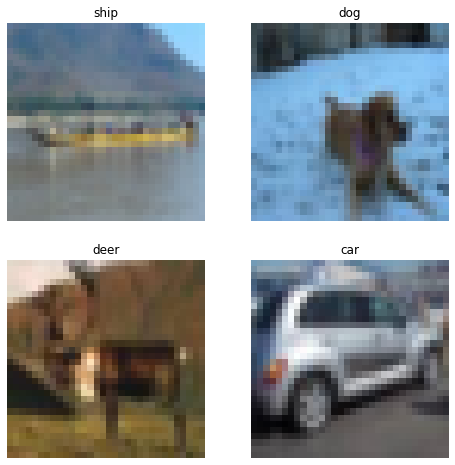

In [10]:
# plot some random image 
import random 
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8))
for i in range(4):
  plt.subplot(2, 2, i+1) 
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[y_train[rand_index][0]])
  plt.axis(False)

### Feature Engineering: Normalization

Normalize the data to 0-1 by dividing it with the maximum number 

In [11]:
# train and test data maximum number
X_train.max(), X_test.max()

(255, 255)

In [14]:
# Normalize data
X_train_norm = X_train / 255.0 
X_test_norm = X_test / 255.0

In [15]:
# check min and max values of the normalized training data
X_train_norm.min(), X_train_norm.max()

(0.0, 1.0)

In [16]:
# check min and max values of the normalized testing data
X_test_norm.min(), X_test_norm.max()

(0.0, 1.0)

### Build a Neural Networks Model

In [17]:
# set random seed 
tf.random.set_seed(42)

# 1. create a model 
cifar_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)), 
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
]) 

# 2. compile the model 
cifar_10.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

# 3. find the ideal learning rate 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. fit the model 
history_c = cifar_10.fit(tf.expand_dims(X_train_norm, axis = -1), 
                         y_train, epochs = 20, 
                         validation_data = (X_test_norm, y_test), 
                         callbacks = [lr_scheduler])

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9579 - accuracy: 0.2900 - val_loss: 1.8230 - val_accuracy: 0.3451 - lr: 1.0000e-04
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7819 - accuracy: 0.3639 - val_loss: 1.7279 - val_accuracy: 0.3784 - lr: 1.1220e-04
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7078 - accuracy: 0.3929 - val_loss: 1.7081 - val_accuracy: 0.3998 - lr: 1.2589e-04
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6568 - accuracy: 0.4125 - val_loss: 1.6406 - val_accuracy: 0.4190 - lr: 1.4125e-04
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6173 - accuracy: 0.4261 - val_loss: 1.5987 - val_accuracy: 0.4335 - lr: 1.5849e-04
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5867 - accuracy: 0.4382 - val_loss: 1.5730 - val_accuracy: 0.4455 - lr: 1.7783e-04
Epoch 7/20
1563/1563 [===========

In [18]:
# Build a model with increase hidden layers 
# set random seed 
tf.random.set_seed(42)

# 1. create a model 
cifar_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)), 
    tf.keras.layers.Dense(80, activation = 'relu'),
    tf.keras.layers.Dense(80, activation = 'relu'),
    tf.keras.layers.Dense(80, activation = 'relu'),
    tf.keras.layers.Dense(80, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
]) 

# 2. compile the model 
cifar_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

# 3. find the ideal learning rate 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. fit the model 
history_cc = cifar_11.fit(tf.expand_dims(X_train_norm, axis = -1), 
                         y_train, epochs = 20, 
                         validation_data = (X_test_norm, y_test), 
                         callbacks = [lr_scheduler])

Epoch 1/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.9104 - accuracy: 0.3113 - val_loss: 1.7668 - val_accuracy: 0.3677 - lr: 1.0000e-04
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7283 - accuracy: 0.3821 - val_loss: 1.6618 - val_accuracy: 0.4032 - lr: 1.1220e-04
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6471 - accuracy: 0.4125 - val_loss: 1.6401 - val_accuracy: 0.4178 - lr: 1.2589e-04
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5927 - accuracy: 0.4306 - val_loss: 1.6055 - val_accuracy: 0.4326 - lr: 1.4125e-04
Epoch 5/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5494 - accuracy: 0.4490 - val_loss: 1.5418 - val_accuracy: 0.4482 - lr: 1.5849e-04
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5182 - accuracy: 0.4586 - val_loss: 1.5101 - val_accuracy: 0.4620 - lr: 1.7783e-04
Epoch 7/20
1563/1563 [==========

In [19]:
# Build a model with increase hidden layers 
# set random seed 
tf.random.set_seed(42)

# 1. create a model 
cifar_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)), 
    tf.keras.layers.Dense(530, activation = 'relu'),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(520, activation = 'relu'),
    tf.keras.layers.Dense(490, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
]) 

# 2. compile the model 
cifar_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

# 3. find the ideal learning rate 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. fit the model 
history_cc = cifar_11.fit(tf.expand_dims(X_train_norm, axis = -1), 
                         y_train, epochs = 20, 
                         validation_data = (X_test_norm, y_test), 
                         callbacks = [lr_scheduler])

Epoch 1/20
1563/1563 [==============================] - 43s 27ms/step - loss: 1.7967 - accuracy: 0.3528 - val_loss: 1.6330 - val_accuracy: 0.4213 - lr: 1.0000e-04
Epoch 2/20
1563/1563 [==============================] - 40s 26ms/step - loss: 1.6007 - accuracy: 0.4279 - val_loss: 1.5538 - val_accuracy: 0.4459 - lr: 1.1220e-04
Epoch 3/20
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5225 - accuracy: 0.4537 - val_loss: 1.5026 - val_accuracy: 0.4688 - lr: 1.2589e-04
Epoch 4/20
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4667 - accuracy: 0.4755 - val_loss: 1.4929 - val_accuracy: 0.4637 - lr: 1.4125e-04
Epoch 5/20
1563/1563 [==============================] - 40s 26ms/step - loss: 1.4232 - accuracy: 0.4920 - val_loss: 1.4582 - val_accuracy: 0.4815 - lr: 1.5849e-04
Epoch 6/20
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3869 - accuracy: 0.5033 - val_loss: 1.4267 - val_accuracy: 0.4936 - lr: 1.7783e-04
Epoch 7/20
1563/1563 [

In [21]:
cifar_11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 530)               1628690   
                                                                 
 dense_10 (Dense)            (None, 500)               265500    
                                                                 
 dense_11 (Dense)            (None, 520)               260520    
                                                                 
 dense_12 (Dense)            (None, 490)               255290    
                                                                 
 dense_13 (Dense)            (None, 10)                4910      
                                                                 
Total params: 2,414,910
Trainable params: 2,414,910
No

In [28]:
# Build a model with increase hidden layers 
# set random seed 
tf.random.set_seed(42)

# 1. create a model 
cifar_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)), 
    tf.keras.layers.Dense(750, activation = 'relu'),
    tf.keras.layers.Dense(650, activation = 'relu'),
    tf.keras.layers.Dense(550, activation = 'relu'),
    tf.keras.layers.Dense(450, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
]) 

# 2. compile the model 
cifar_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

# 3. find the ideal learning rate 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. fit the model 
history_cc = cifar_11.fit(tf.expand_dims(X_train_norm, axis = -1), 
                         y_train, epochs = 20, 
                         validation_data = (X_test_norm, y_test), 
                         callbacks = [lr_scheduler])

Epoch 1/20
1563/1563 [==============================] - 58s 36ms/step - loss: 1.7973 - accuracy: 0.3501 - val_loss: 1.6686 - val_accuracy: 0.4076 - lr: 1.0000e-04
Epoch 2/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6072 - accuracy: 0.4255 - val_loss: 1.5446 - val_accuracy: 0.4462 - lr: 1.1220e-04
Epoch 3/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5246 - accuracy: 0.4550 - val_loss: 1.5143 - val_accuracy: 0.4650 - lr: 1.2589e-04
Epoch 4/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4667 - accuracy: 0.4756 - val_loss: 1.4988 - val_accuracy: 0.4625 - lr: 1.4125e-04
Epoch 5/20
1563/1563 [==============================] - 57s 37ms/step - loss: 1.4216 - accuracy: 0.4946 - val_loss: 1.4901 - val_accuracy: 0.4692 - lr: 1.5849e-04
Epoch 6/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3839 - accuracy: 0.5064 - val_loss: 1.4129 - val_accuracy: 0.5006 - lr: 1.7783e-04
Epoch 7/20
1563/1563 [

In [29]:
cifar_11.evaluate(X_test_norm, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.4669 - accuracy: 0.4966


[1.4668903350830078, 0.4966000020503998]

# Build another model 
- Increase the number of hidden neurons to 2500 
- Increase the number of epochs to 30

In [45]:
# Build a model with increase hidden layers 
# set random seed 
tf.random.set_seed(42)

# 1. create a model 
cifar_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)), 
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(700, activation = 'relu'),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
]) 

# 2. compile the model 
cifar_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

# 3. find the ideal learning rate 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. fit the model 
history_c13 = cifar_13.fit(tf.expand_dims(X_train_norm, axis = -1), 
                         y_train, epochs = 30, 
                         validation_data = (X_test_norm, y_test), 
                         callbacks = [lr_scheduler])

Epoch 1/30
1563/1563 [==============================] - 69s 44ms/step - loss: 1.8011 - accuracy: 0.3519 - val_loss: 1.6492 - val_accuracy: 0.4112 - lr: 1.0000e-04
Epoch 2/30
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6089 - accuracy: 0.4254 - val_loss: 1.5496 - val_accuracy: 0.4490 - lr: 1.1220e-04
Epoch 3/30
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5256 - accuracy: 0.4520 - val_loss: 1.5341 - val_accuracy: 0.4606 - lr: 1.2589e-04
Epoch 4/30
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4688 - accuracy: 0.4756 - val_loss: 1.4718 - val_accuracy: 0.4782 - lr: 1.4125e-04
Epoch 5/30
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4261 - accuracy: 0.4911 - val_loss: 1.4746 - val_accuracy: 0.4678 - lr: 1.5849e-04
Epoch 6/30
1563/1563 [==============================] - 63s 40ms/step - loss: 1.3900 - accuracy: 0.5023 - val_loss: 1.4171 - val_accuracy: 0.4979 - lr: 1.7783e-04
Epoch 7/30
1563/1563 [

In [88]:
cifar_13.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 171.7491 - accuracy: 0.4301


[171.7490997314453, 0.4300999939441681]

In [46]:
# Build a model with increase hidden layers 
# set random seed 
tf.random.set_seed(42)

# 1. create a model 
cifar_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)), 
    tf.keras.layers.Dense(800, activation = 'relu'),
    tf.keras.layers.Dense(600, activation = 'relu'),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(400, activation = 'relu'), 
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
]) 

# 2. compile the model 
cifar_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

# 3. find the ideal learning rate 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. fit the model 
history_c14 = cifar_14.fit(tf.expand_dims(X_train_norm, axis = -1), 
                         y_train, epochs = 20, 
                         validation_data = (X_test_norm, y_test), 
                         callbacks = [lr_scheduler])

Epoch 1/20
1563/1563 [==============================] - 56s 35ms/step - loss: 1.8060 - accuracy: 0.3451 - val_loss: 1.6682 - val_accuracy: 0.4110 - lr: 1.0000e-04
Epoch 2/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6120 - accuracy: 0.4228 - val_loss: 1.5403 - val_accuracy: 0.4467 - lr: 1.1220e-04
Epoch 3/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5340 - accuracy: 0.4495 - val_loss: 1.5217 - val_accuracy: 0.4643 - lr: 1.2589e-04
Epoch 4/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4770 - accuracy: 0.4715 - val_loss: 1.4945 - val_accuracy: 0.4703 - lr: 1.4125e-04
Epoch 5/20
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4360 - accuracy: 0.4866 - val_loss: 1.4565 - val_accuracy: 0.4785 - lr: 1.5849e-04
Epoch 6/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4007 - accuracy: 0.4997 - val_loss: 1.4248 - val_accuracy: 0.4936 - lr: 1.7783e-04
Epoch 7/20
1563/1563 [

In [87]:
cifar_14.evaluate(X_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 194.2562 - accuracy: 0.4349


[194.25619506835938, 0.4348999857902527]

Guidelines to determining the number of Hidden layers and Neurons 

> 1. The number of hidden neurons should be between the size of the output layer and the size of the input layer. 

> 2. The number of hidden neurons should 2/3 of the size of the input layer, plus the size of the output layer. 

> 3. The number of hidden neurons should be less than 2 times the size of the input layer. 

> 4. In classification problems, increase the number of neurons in the first layer, and then gradually decrease it. 

I applied guideline 2 and 4. 

**NOTE:** These are guidelines that have been tested through research but you still have to experiment to find the one that works for your specific problem statement. 

In [58]:
# input shape for the input layer
input_shape = X_train[0].shape 
input_shape

(32, 32, 3)

In [57]:
# input size for the input layer
input_size = X_train[0].size 
input_size

3072

In [59]:
# output size for the input layer 
# the number of categories in the output feature
output_size = len(class_names) 
output_size

10

In [60]:
# hidden layer size based on guideline 2 
hidden_size = (2/3 * input_size) + output_size
hidden_size

2058.0

In [54]:
# Build a model with increase hidden layers 
# set random seed 
tf.random.set_seed(42)

# 1. create a model 
cifar_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)), 
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(600, activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
]) 

# 2. compile the model 
cifar_15.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['accuracy'])

# 3. find the ideal learning rate 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. fit the model 
history_c15 = cifar_15.fit(tf.expand_dims(X_train_norm, axis = -1), 
                         y_train, epochs = 15, 
                         validation_data = (X_test_norm, y_test), 
                         callbacks = [lr_scheduler])

Epoch 1/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.8109 - accuracy: 0.3498 - val_loss: 1.6699 - val_accuracy: 0.4065 - lr: 1.0000e-04
Epoch 2/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6232 - accuracy: 0.4206 - val_loss: 1.5580 - val_accuracy: 0.4424 - lr: 1.1220e-04
Epoch 3/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5396 - accuracy: 0.4507 - val_loss: 1.5378 - val_accuracy: 0.4612 - lr: 1.2589e-04
Epoch 4/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4848 - accuracy: 0.4689 - val_loss: 1.4895 - val_accuracy: 0.4675 - lr: 1.4125e-04
Epoch 5/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4405 - accuracy: 0.4873 - val_loss: 1.4745 - val_accuracy: 0.4729 - lr: 1.5849e-04
Epoch 6/15
1563/1563 [==============================] - 57s 37ms/step - loss: 1.4053 - accuracy: 0.4967 - val_loss: 1.4251 - val_accuracy: 0.4900 - lr: 1.7783e-04
Epoch 7/15
1563/1563 [

### Model Summary

In [86]:
# model summary
cifar_15.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 3072)              0         
                                                                 
 dense_48 (Dense)            (None, 1000)              3073000   
                                                                 
 dense_49 (Dense)            (None, 600)               600600    
                                                                 
 dense_50 (Dense)            (None, 300)               180300    
                                                                 
 dense_51 (Dense)            (None, 200)               60200     
                                                                 
 dense_52 (Dense)            (None, 10)                2010      
                                                                 
Total params: 3,916,110
Trainable params: 3,916,110
No

### Loss and Accuracy score

<Figure size 576x360 with 0 Axes>

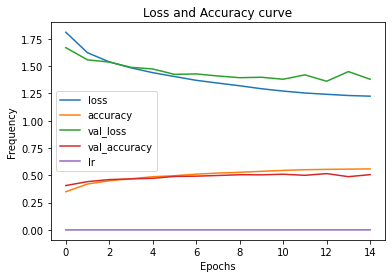

In [70]:
import pandas as pd 
plt.figure(figsize = (8, 5))
pd.DataFrame(history_c15.history).plot(title = 'Loss and Accuracy curve', 
                                       xlabel = 'Epochs', 
                                       ylabel = 'Frequency')

### Evaluate the model

In [56]:
# evaluate
cifar_15.evaluate(X_test_norm, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.3803 - accuracy: 0.5065


[1.3802822828292847, 0.5065000057220459]

### predict unseen data 


In [62]:
# predict
Y_probs = cifar_15.predict(X_test_norm)
y_probs[0]

313/313 [==============================] - 4s 14ms/step


array([0.0256105 , 0.1349701 , 0.12286147, 0.17664318, 0.12896363,
       0.06927995, 0.00349375, 0.03478113, 0.26302117, 0.04037523],
      dtype=float32)

- the probabilities for each class prediction was given

In [64]:
### Find the class with the highest prediction probabilities 
y_pred = tf.argmax(y_probs, axis = 1)
y_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([8, 8, 8, 8, 6, 6, 1, 6, 5, 1])>

### Confusion matrix 

In [77]:
# import confusion matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix
confusion_matrix(y_test, y_pred)

array([[430,  25, 129,  28,  23,  12,  24,  19, 268,  42],
       [ 23, 540,  11,  23,   9,  14,  13,  16, 159, 192],
       [ 35,  13, 491,  95,  94,  55, 106,  35,  53,  23],
       [ 14,  14, 111, 369,  58, 146, 139,  37,  65,  47],
       [ 32,  11, 238,  78, 357,  28, 131,  43,  64,  18],
       [ 12,  11, 102, 264,  51, 304, 111,  45,  74,  26],
       [  3,  13, 127,  82,  77,  26, 612,  18,  17,  25],
       [ 20,  12,  98,  81, 103,  69,  45, 483,  40,  49],
       [ 49,  37,  18,  23,  20,   5,  11,   8, 796,  33],
       [ 26, 100,  15,  39,  16,   8,  26,  33, 153, 584]])

### Prettified Confusion Matrix

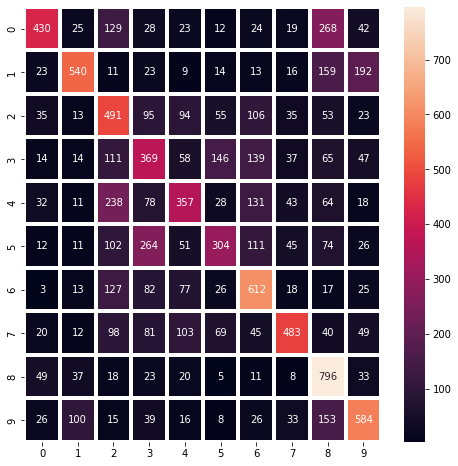

In [75]:
# import seaborn 
import seaborn as sns 
plt.figure(figsize = (8, 8))

# heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot = True, fmt = 'd', linewidth = 3)

In [76]:
# Precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.43      0.52      1000
           1       0.70      0.54      0.61      1000
           2       0.37      0.49      0.42      1000
           3       0.34      0.37      0.35      1000
           4       0.44      0.36      0.39      1000
           5       0.46      0.30      0.36      1000
           6       0.50      0.61      0.55      1000
           7       0.66      0.48      0.56      1000
           8       0.47      0.80      0.59      1000
           9       0.56      0.58      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.52      0.50      0.49     10000
weighted avg       0.52      0.50      0.49     10000



### Image prediction plot

In [83]:
import random 

def plot_random_image(model, images, true_labels, classes): 
  '''
  picks a random image, plots it and labels it with a prediction and truth label
  ''' 
  # set up random integer 
  i = random.randint(0, len(images)) 

  # create predictions and target
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(32, 32, 3))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i][0]]

  # plot the image 
  plt.imshow(target_image, cmap = plt.cm.binary)

  # change the color of the titles depending on if the prediction is right or worng 
  if pred_label == true_label:
    color = 'green'
  else: 
    color = 'red'

  # add xlabel information (prediction/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label, 
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label), 
             color = color)

1/1 [==============================] - 0s 22ms/step


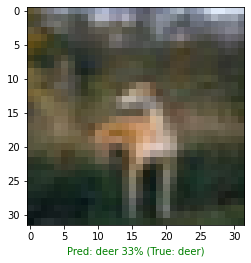

In [85]:
# check out a random image as well as it's prediction 
plot_random_image(cifar_15, X_test_norm, 
                  y_test, class_names)
     

### Save model

In [89]:
# save model .h5 format
cifar_15.save('Cifar_multiclass_model.h5')